<h1 align="center" style='color:#66ccff'><b>GRIP : The Sparks Foundation</b></h1>

<h1 align="center" style='color:#66ccff'><b>Data Science and Business Analytics Intern</h1>

<h1 align='center' style='color:#66ccff'> <i><b>Task 2: Prediction using Unsupervised ML </h1> <br>
<h2 align='center'> Problem Statement : <br>
From the Given 'Iris' data set, predict the optimum number of clusters and represent it visually. <h2>


<hr>
<h1>Author : Jagrut Manish Thakare</h1>
<hr>

In [11]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# Load the iris dataset
iris = pd.read_csv('iris.csv')
iris.head() # See the first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<hr>
<h1>DATA EXPLORATION</h1>
<hr>

In [13]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


<hr>
<h2>OUTLIER TREATMENT</h1>
<hr>

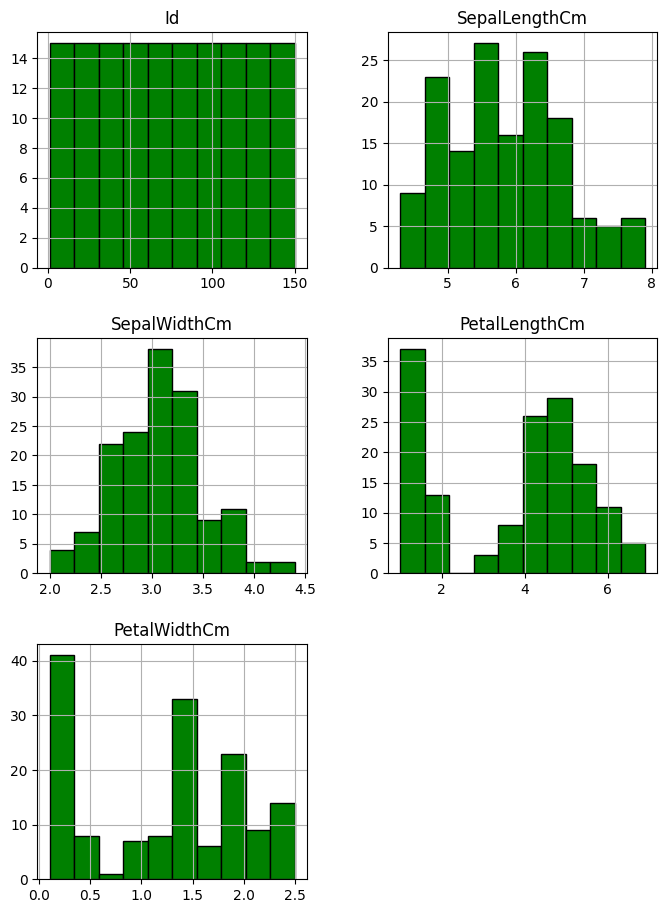

In [18]:
iris.hist(figsize=(8,11), color='g',edgecolor='black')
plt.show()
#Sepal Width is suspicious for outliers.

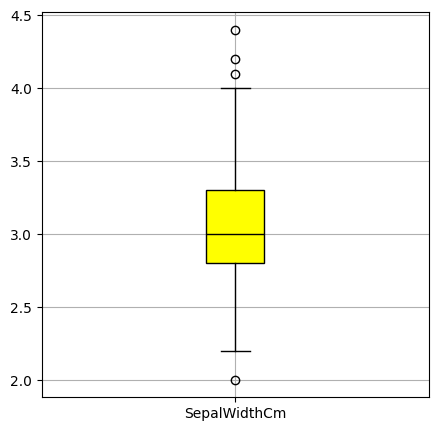

In [23]:
iris.boxplot(column=['SepalWidthCm'], figsize=(5,5), color='black',patch_artist=True, boxprops=dict(facecolor='yellow'))
plt.show()

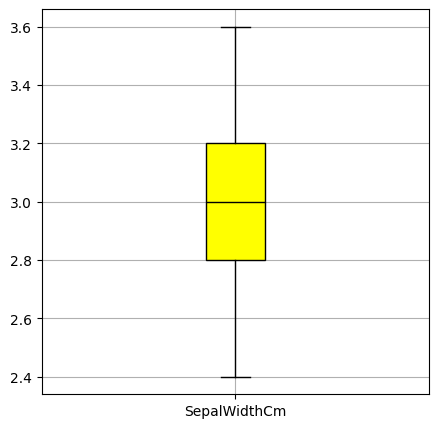

In [5]:
iris['SepalWidthCm'] = np.where(iris['SepalWidthCm'] > iris['SepalWidthCm'].quantile(0.90),
                                iris['SepalWidthCm'].quantile(0.50), iris['SepalWidthCm'])
iris['SepalWidthCm'] = np.where(iris['SepalWidthCm'] < iris['SepalWidthCm'].quantile(0.05),
                                iris['SepalWidthCm'].quantile(0.50), iris['SepalWidthCm'])
iris.boxplot(column=['SepalWidthCm'],figsize=(5,5), return_type='axes', color='black', patch_artist=True, boxprops=dict(facecolor='yellow'))

cluster = iris
plt.show()

<hr>
<h2>ENCODING CATEGORIAL VARIABLE </h2>
<hr>

In [6]:
dummies = pd.get_dummies(iris['Species'], prefix='Species')
iris = pd.concat([iris, dummies], axis=1)
iris.drop('Species', axis=1, inplace=True)
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,True,False,False
1,2,4.9,3.0,1.4,0.2,True,False,False
2,3,4.7,3.2,1.3,0.2,True,False,False
3,4,4.6,3.1,1.5,0.2,True,False,False
4,5,5.0,3.6,1.4,0.2,True,False,False


<hr>
<h1>DATA SCALING</h1>
<hr>

In [7]:
from sklearn.preprocessing import MinMaxScaler as MMS
mms = MMS()
mms.fit(iris)
iris = mms.transform(iris)
print(iris)

[[0.         0.22222222 0.91666667 ... 1.         0.         0.        ]
 [0.00671141 0.16666667 0.5        ... 1.         0.         0.        ]
 [0.01342282 0.11111111 0.66666667 ... 1.         0.         0.        ]
 ...
 [0.98657718 0.61111111 0.5        ... 0.         0.         1.        ]
 [0.99328859 0.52777778 0.83333333 ... 0.         0.         1.        ]
 [1.         0.44444444 0.5        ... 0.         0.         1.        ]]


<hr>
<h1>METHODS TO CALCULATE K<h1>
<hr>
<hr>
<h2>1. ELBOW METHOD<h2>
<hr>


In [8]:
from sklearn.cluster import KMeans as KM
from yellowbrick.cluster import KElbowVisualizer as KV
model=KM()
elbow = KV(model,k=(1,10))
elbow.fit(iris)
elbow.poof()

ModuleNotFoundError: No module named 'yellowbrick'

<hr>
<h2>2. USING SILHOUETTE INDEX<h2>
<hr>


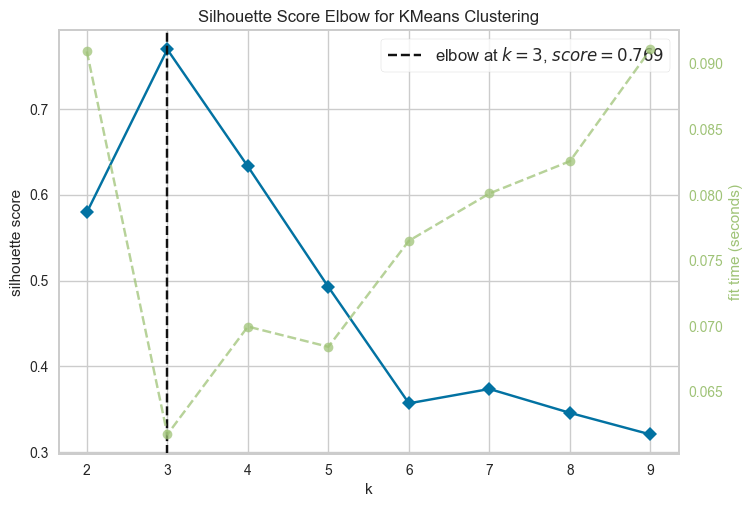

<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
model = KM(iris)
sil = KV(model, k=(2,10),metric='silhouette')
sil.fit(iris)       
sil.poof()

<hr>
<h2>3. USING CALINSKI-HARABASZ INDEX
<h2>
<hr>


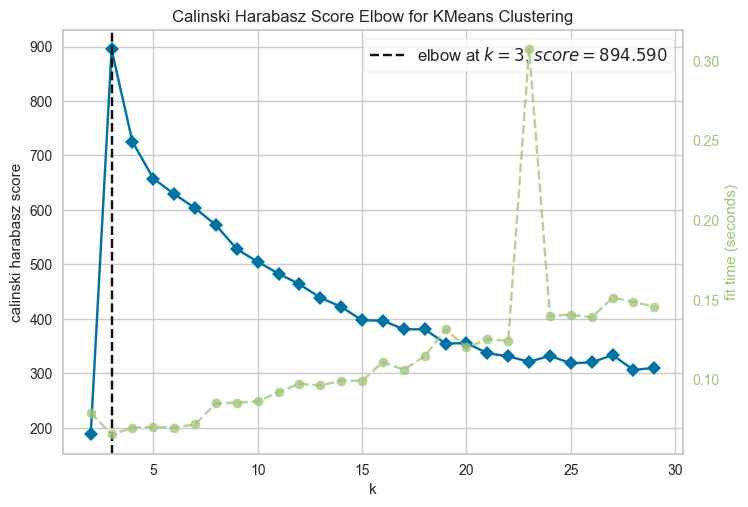

<AxesSubplot: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [ ]:
ch_index = KV(model, k=(2,30),metric='calinski_harabasz')
ch_index.fit(iris)       
ch_index.show() 

<hr>
<h2>4. SILHOUETTE METHOD<h2>
<hr>


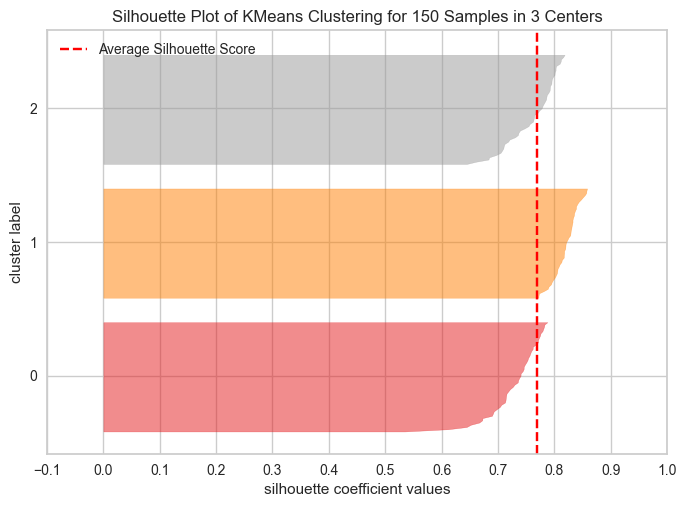

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 150 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer as SV
model= KM(3)
sil = SV(model)
sil.fit(iris)
sil.poof()


<hr>
<h2>5. DENDROGRAM<h2>
<hr>


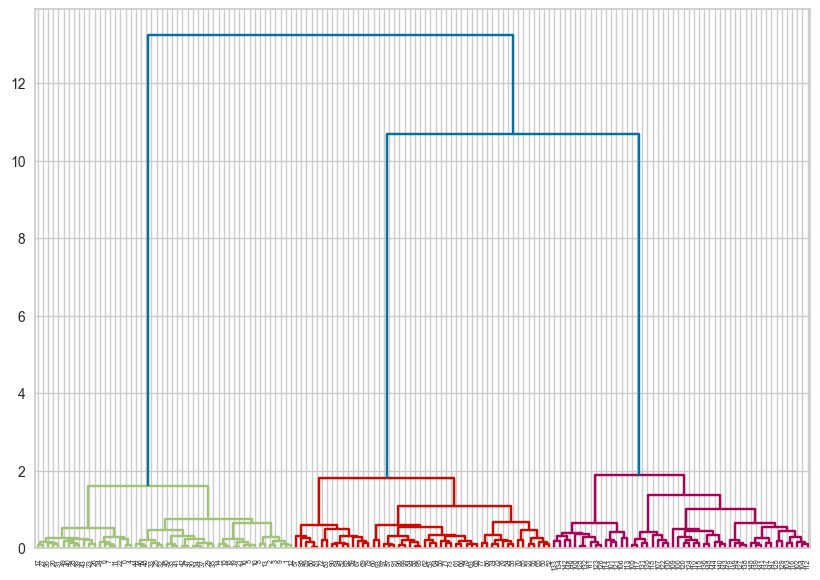

In [ ]:
import scipy.cluster.hierarchy as hier
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
dendrogram = hier.dendrogram(hier.linkage(iris, method='ward'))

<hr>
<h2>CREATING K-MEANS CLASSIFIER<h1>
<hr>


In [ ]:
kmeans = KM(n_clusters= 3)
label = kmeans.fit_predict(iris)
print(label)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


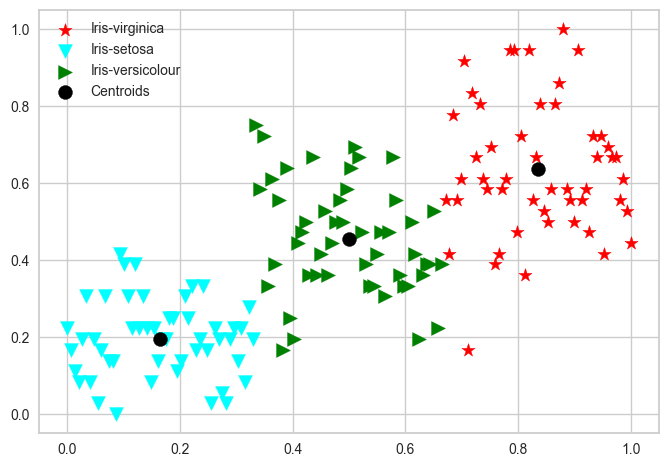

In [ ]:
label_0 = iris[label == 0]
label_1 = iris[label == 1]
label_2 = iris[label == 2]
plt.scatter(label_0[:,0] , label_0[:,1] ,marker= '*', s=100, color = 'red', label = 'Iris-virginica')
plt.scatter(label_1[:,0] , label_1[:,1] ,marker= 'v', s=100, color = 'cyan', label = 'Iris-setosa')
plt.scatter(label_2[:,0] , label_2[:,1] ,marker= '>', s=100, color = 'green', label = 'Iris-versicolour')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s=100, c = 'black', label = 'Centroids')
plt.legend()